## Solar Power Plants. How do they work?
**The metrics which define its efficiency and working**

![](https://cdn.pixabay.com/photo/2019/10/04/09/47/photovoltaic-4525178_1280.jpg)

**Solar Panels are made up of different photovoltaic cells connected in series. To understand the working of the solar power generation.
We first have to understand what are photovoltaic cells, what are they made up of and how do they generate Dc Power with the help of irradiation from the Sun.
Photovoltaic cells are made up by combining two types of sillicone materials one over another. The upper part of the cell contains N-Type semiconductors containing excess electrons and the bottom part is made up of P-Type semiconductor containing holes. When they are connected a P-N Junction is formed at boundary of the two.**


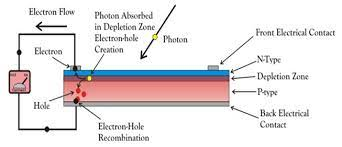

![](https://www.google.com/imgres?imgurl=https%3A%2F%2Fenergyeducation.ca%2Fwiki%2Fimages%2Fthumb%2F1%2F11%2FPhotovoltaiceffect.png%2F400px-Photovoltaiceffect.png&imgrefurl=https%3A%2F%2Fenergyeducation.ca%2Fencyclopedia%2FPhotovoltaic_cell&tbnid=ERbyP23vtn85uM&vet=12ahUKEwizzrX3lMb2AhX6mdgFHaz3BvAQMygCegUIARDbAQ..i&docid=0Gjs_N_UHc7_jM&w=400&h=310&q=solar%20cell%20diagram&ved=2ahUKEwizzrX3lMb2AhX6mdgFHaz3BvAQMygCegUIARDbAQ)

**When photons hit the electrons at the N-Type junction the electron absorbs its energy and try to move to the P-Type semiconductor creating a flow of charge generating a potential difference between the two sides thus resulting in Dc Power Generation.**  
**Then the Dc Power is transfered to the Inverters which converts it into Ac Power and then steps up the current according to the requirement of the plant.**
![](https://www.mechanicalbooster.com/wp-content/uploads/2017/12/solar-power-plant-1.png?ezimgfmt=ng:webp/ngcb20)

### Typically the factors that determine the efficiency of the solar power plant are:
1. The Irradiation falling on the solar panels.
2. Cleanliness of the solar panels.
3. Inverter efficiency
4. Ambient Temperature (For the plant to work efficiently, the ideal temperature        ranges between 35 - 50 degress C.)
5. Inverter or Panel Seniority

#### The questions which we will be trying to answer through our analysis:
1. Can we identify the faulty or suboptimally performing equipments?
2. Can we identify the need for panel cleaning and maintenance?

**Lets start by performing some EDA on to our dataset.**

**But first lets start by loading the libraries with which we are gonna be working with**

In [1]:
# Loading the required libraries.
library(tidyverse)
library(dplyr)
library(skimr)
library(janitor)
library(here)
library(RColorBrewer)
library(plotly)
library(psych)
library(lubridate)
library(gridExtra)
library(htmlwidgets)
library(IRdisplay)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘lubridate’


The following obj

**Now lets load the dataset**

In [2]:
# Loading the dataset into Dataframes.
plant1_gen <- read_csv("../input/solar-power-generation-data/Plant_1_Generation_Data.csv")
plant2_gen <- read_csv("../input/solar-power-generation-data/Plant_2_Generation_Data.csv")
plant1_we <- read_csv("../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv")
plant2_we <- read_csv("../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv")

Rows: 68778 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): DATE_TIME, SOURCE_KEY
dbl (5): PLANT_ID, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 67698 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SOURCE_KEY
dbl  (5): PLANT_ID, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD
dttm (1): DATE_TIME


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3182 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SOURCE_KEY
dbl  (4): PLANT_ID, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION
dttm (1): DATE_TIME


ℹ Use `spe

**Some limitations in the dataset:**  
1. The dataset contains data about two plants during the same duration of 34 days. But we can see that the generation data for both the plants have different number of rows which means we have some missing data for certain time periods.*  
2. The dataframe containing the plant 1 generation data time is recognised as character, we have to fix that.*  
3. The column names are in all caps case, they will be changed to lower_camel case type.*  
4. The unit of Irradiation is not given. We will be assuming it in W/m^2.*  
5. Also the dataset contains no data about the area of the solar panels. Because of which we can't calculate the solar energy received by a solar panel. Since, solar energy received is:* 

**Irradiation * Area.**


**Some Assumptions which I have made.**
1. Since, only one value of irradiation is given for the entire plant. I will be assuming the irradiation is same for every solar panel in the respective plant.
2. I will be assuming that the area of all the solar panels for a respective plant is the same.

In [3]:
# Changing column names case.
plant1_gen <- plant1_gen %>% 
  clean_names(case = "lower_camel")
plant2_gen <- plant2_gen %>% 
  clean_names(case = "lower_camel")
plant1_we <- plant1_we %>% 
  clean_names(case = "lower_camel")
plant2_we <- plant2_we %>% 
  clean_names(case = "lower_camel")

In [4]:
# Changing the column dateTime data type to dattime.
plant1_gen <- plant1_gen %>% 
  mutate(dateTime = dmy_hm(dateTime))
# Adding the columns date and time.
plant1_gen <- plant1_gen %>% 
  mutate(time = format(dateTime, format = "%H:%M")) %>% 
  mutate(date = date(dateTime))
plant2_gen <- plant2_gen %>% 
  mutate(time = format(dateTime, format = "%H:%M")) %>% 
  mutate(date = date(dateTime))
plant2_we <- plant2_we %>% 
  mutate(time = format(dateTime, format = "%H:%M")) %>% 
  mutate(date = date(dateTime))
plant1_we <- plant1_we %>% 
  mutate(time = format(dateTime, format = "%H:%M")) %>% 
  mutate(date = date(dateTime))

**One important metric to determine if an inverter or solar panel is working efficiently or not will be the Electrical Efficiency**
**So lets just calculate that**

In [5]:
# Calculating electrical efficiency for the two plants.
plant1_gen <- plant1_gen %>% 
  mutate(electrical_eff = if_else(dcPower == 0 | acPower == 0, 0, (acPower/dcPower)*100))

plant2_gen <- plant2_gen %>% 
  mutate(electrical_eff = if_else(dcPower == 0 | acPower == 0, 0, (acPower/dcPower)*100))

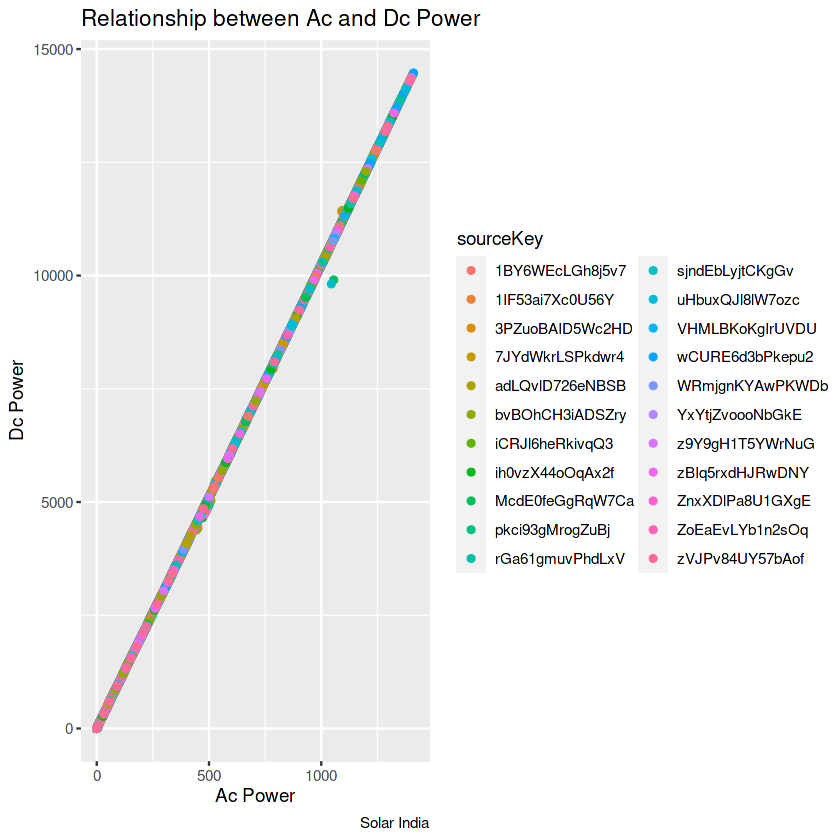

In [6]:
plant1_gen %>%
ggplot() +
geom_point(aes(x = acPower, y = dcPower, color = sourceKey)) +
labs(title = "Relationship between Ac and Dc Power", caption = "Solar India", x = "Ac Power", y = "Dc Power")

**We can see that the Ac and Dc Power have linear correlation, with absolutely no outliers**


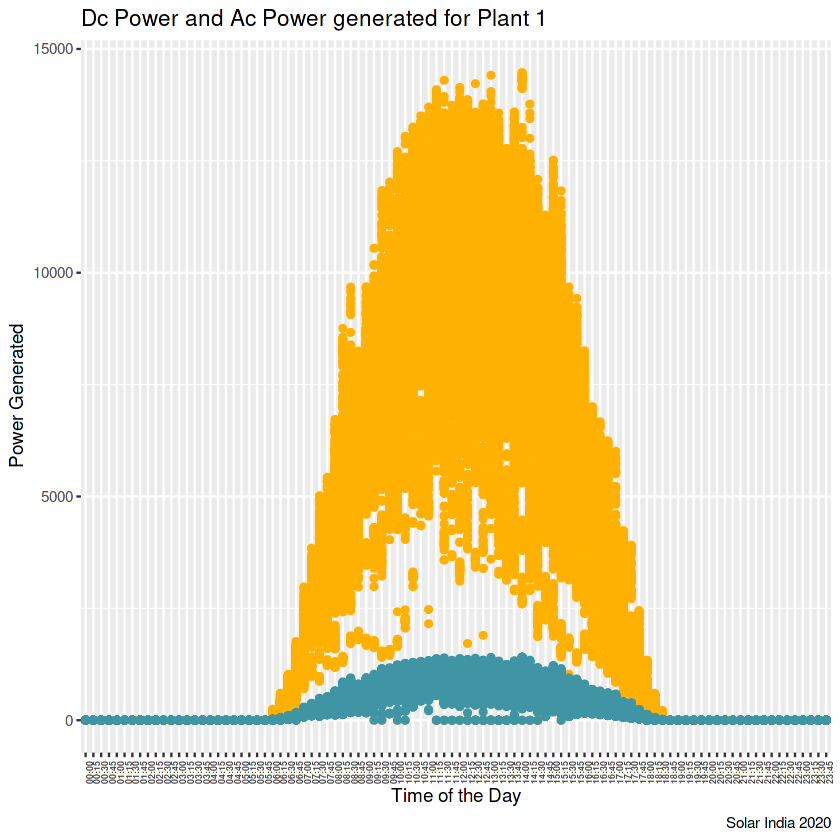

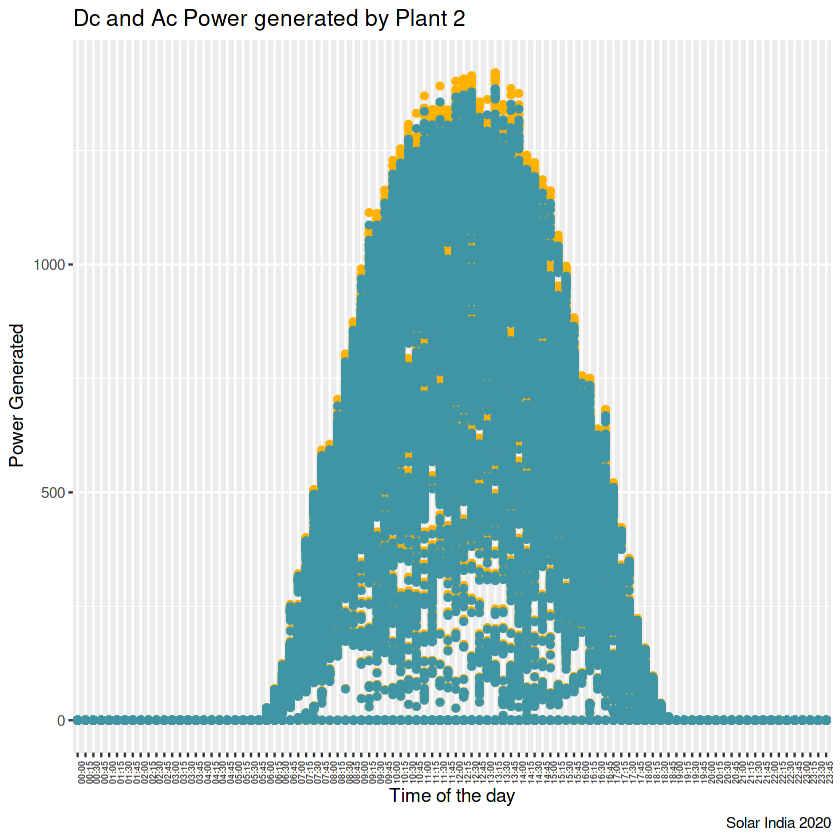

In [7]:
# Plotting DC Power v/s Ac Power for the two plants.
plant1_gen %>% 
  ggplot() +
  geom_point(aes(x = time, y = dcPower), color = "#ffb100") +
  geom_point(aes(x = time, y = acPower), color = "#4095a5") +
labs(title = "Dc Power and Ac Power generated for Plant 1", caption = "Solar India 2020", x = "Time of the Day", y = "Power Generated") +
theme(axis.text.x = element_text(angle = 90, face = "bold", size = 5))
plant2_gen %>% 
  ggplot() +
  geom_point(aes(x = time, y = dcPower), color = "#ffb100") +
  geom_point(aes(x = time, y = acPower), color = "#4095a5") +
labs(title = "Dc and Ac Power generated by Plant 2", caption = "Solar India 2020", x = "Time of the day", y = "Power Generated") +
theme(axis.text.x = element_text(angle = 90, face = "bold", size = 5))

**Insights**
1. There is a large gap between the Ac and Dc power for Plant1 as compared to Plant2.
Let's investigate it further.

In [8]:
# Calculating the Ac and Dc Power generated and daily yields for the two plants.
plant1_gen %>% 
  group_by(date, sourceKey) %>% 
  summarize(dc_power = sum(dcPower),ac_power = sum(acPower), daily_yield = max(dailyYield)) %>%
head(10)
plant2_gen %>% 
  group_by(date, sourceKey) %>% 
  summarize(dc_power = sum(dcPower),ac_power = sum(acPower), daily_yield = max(dailyYield)) %>%
head(10)

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



date,sourceKey,dc_power,ac_power,daily_yield
<date>,<chr>,<dbl>,<dbl>,<dbl>
2020-05-15,1BY6WEcLGh8j5v7,235340.7,23046.55,5754
2020-05-15,1IF53ai7Xc0U56Y,258911.1,25343.29,6357
2020-05-15,3PZuoBAID5Wc2HD,254766.1,24937.70,6274
2020-05-15,7JYdWkrLSPkdwr4,250608.3,24533.91,6116
2020-05-15,adLQvlD726eNBSB,260159.1,25463.08,6383
2020-05-15,bvBOhCH3iADSZry,235084.3,23022.84,5707
2020-05-15,iCRJl6heRkivqQ3,264120.1,25847.75,6418
2020-05-15,ih0vzX44oOqAx2f,252825.2,24750.46,6176
2020-05-15,McdE0feGgRqW7Ca,264031.0,25840.63,6471


`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



date,sourceKey,dc_power,ac_power,daily_yield
<date>,<chr>,<dbl>,<dbl>,<dbl>
2020-05-15,4UPUqMRk7TRMgml,17112.65,16744.08,9425
2020-05-15,81aHJ1q11NBPMrL,13169.45,12896.82,3214
2020-05-15,9kRcWv60rDACzjR,37844.57,36973.36,9246
2020-05-15,Et9kgGMDl729KT4,16995.83,16638.90,4154
2020-05-15,IQ2d7wF4YD8zU1Q,39559.09,38635.70,9663
2020-05-15,LlT2YUhhzqhg5Sw,37804.32,36933.62,9234
2020-05-15,LYwnQax7tkwH5Cb,34714.97,33919.64,8458
2020-05-15,mqwcsP2rE7J0TFp,38678.04,37779.74,9442
2020-05-15,Mx2yZCDsyf6DPfv,31970.31,31237.96,7800


**We can see that all the values for the two plants are comparable except the Dc Power which seems to be 10 times more than Plant 2.**  
**This maybe due to some errors while recording the data. This can be informed to the Data Engineering team to look for issues.**  
**Lets fix that**

In [9]:
# Correcting the Dc Power for Plant 1.
plant1_gen <- plant1_gen %>% 
  mutate(dcPower = dcPower/10)
# Recalculating the Electrical Efficiency.
plant1_gen <- plant1_gen %>% 
  mutate(electrical_eff = if_else(dcPower == 0 | acPower == 0, 0, (acPower/dcPower)*100))

### Data Integrity Checkups.
#### 1. Handling NAs
**Handling NAs is one of the most inevitable tasks while working with data, they can be generated due to human errors, missing data, etc**

Lets see if we have any NAs in our dataset.

In [10]:
# Checking for NAs
colSums(is.na(plant1_gen))
colSums(is.na(plant1_we))
colSums(is.na(plant2_gen))
colSums(is.na(plant2_we))

dateTime        plantId      sourceKey        dcPower        acPower 
             0              0              0              0              0 
    dailyYield     totalYield           time           date electrical_eff 
             0              0              0              0              0

dateTime            plantId          sourceKey ambientTemperature 
                 0                  0                  0                  0 
 moduleTemperature        irradiation               time               date 
                 0                  0                  0                  0

dateTime        plantId      sourceKey        dcPower        acPower 
             0              0              0              0              0 
    dailyYield     totalYield           time           date electrical_eff 
             0              0              0              0              0

dateTime            plantId          sourceKey ambientTemperature 
                 0                  0                  0                  0 
 moduleTemperature        irradiation               time               date 
                 0                  0                  0                  0

**Great, we have no missing values in our dataset.**

*Now lets skim through our dataset to look for errors.*

In [11]:
# Inspecting the dataframes.
skim(plant1_gen)
skim(plant2_gen)
skim(plant1_we)
skim(plant2_we)

── Data Summary ────────────────────────
                           Values    
Name                       plant1_gen
Number of rows             68778     
Number of columns          10        
_______________________              
Column type frequency:               
  character                2         
  Date                     1         
  numeric                  6         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 sourceKey             0             1    15    15     0       22          0
2 time                  0             1     5     5     0       96          0

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 date                  0       

**Observations**  
*We can see that we have some values where electrical efficiency is greater that 100% which is impossible. So, we will be removing those rows of data.*  
*Everything else seems good, we don't have any reduntant values.*

In [12]:
# Filtering out values having electrical efficiency > 100%.
plant2_gen <- plant2_gen %>% 
  filter(dcPower >= acPower)
plant1_gen <- plant1_gen %>% 
  filter(dcPower >= acPower)

In [13]:
# Removing sourceKeys from the weather sensor data since all of the rows contain the same source key.
plant1_we <- plant1_we %>% 
  select(-sourceKey)
plant2_we <- plant2_we %>% 
  select(-sourceKey)

**Since, Dc Power Generated by a solar panel is Irradiation * Area of the panel * solar efficiency. And according to our assumption, the area and the irradiation received is the same for every panel.**
**So higher the solar efficiency of the panel, the more Dc Power it produces or We can say that Dc Power is directly proportional to the solar efficiency of the solar panel(In this case).**


**Now, lets calculate the daily yield on different days by different inverters**

In [14]:
# Daily yield for Plant 1.
plant1_by_yield <- plant1_gen %>%
  group_by(date, sourceKey) %>% 
  summarize(yield = max(dailyYield))
# Daily yield for Plant 2.
plant2_by_yield <- plant2_gen %>%
  group_by(date, sourceKey) %>% 
  summarize(yield = max(dailyYield))

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



In [15]:
# Storing the sourceKeys in different variables.
# For first plant.
first11_inv_1 <- plant1_by_yield[1:11,2]
last11_inv_1 <- plant1_by_yield[12:22,2]
# For second plant.
first11_inv_2 <- plant2_by_yield[1:11,2]
last11_inv_2 <- plant2_by_yield[12:22,2]

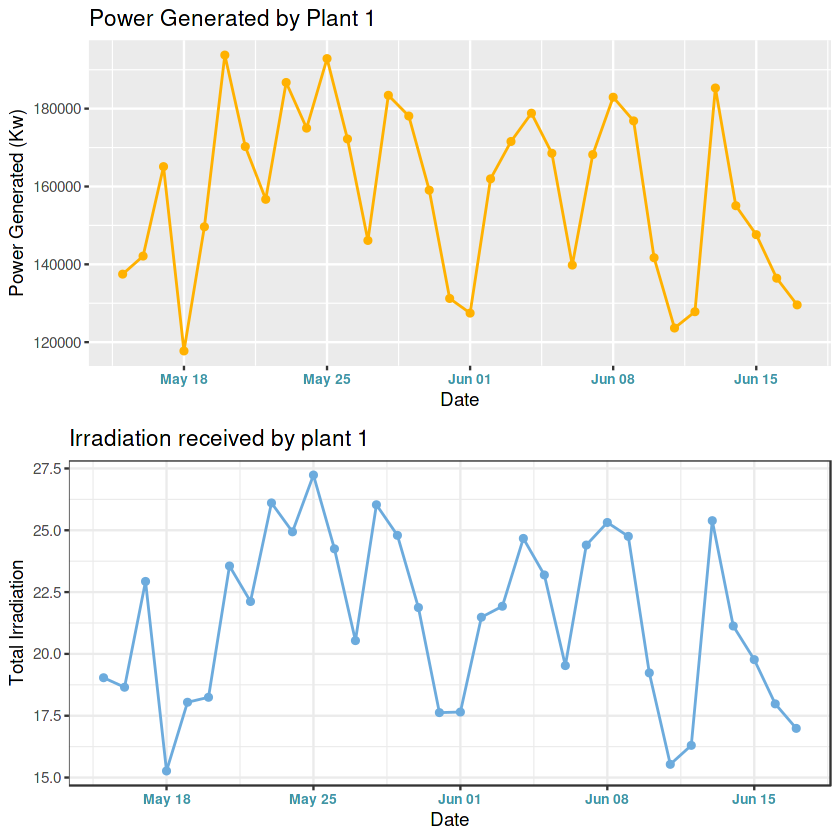

In [16]:
# Plotting daily yield and Irradiation on different days of the week for Plant-1 
yield <- plant1_by_yield %>% 
  group_by(date) %>% 
  summarize(total_yield = sum(yield)) %>% 
  ggplot(aes(x = date, y = total_yield)) +
  geom_line(color = "#ffb100", size = 0.6) + 
  geom_point(color = "#ffb100") +
  labs(title = "Power Generated by Plant 1", x = "Date", y = "Power Generated (Kw)") +
  theme(axis.text.x = element_text(face = "bold", size = 8, color = "#4095a5"))


irradiation <- plant1_we %>% 
  group_by(date = date(dateTime)) %>% 
  summarize(total_irradiation = sum(irradiation)) %>% 
  ggplot(aes(x = date, y = total_irradiation)) +
  geom_line(size = 0.6, color = "#6cabdd") +
  geom_point(color = "#6cabdd") +
  labs(title = "Irradiation received by plant 1", x = "Date", y = "Total Irradiation") +
  theme_bw() +
  theme(axis.text.x = element_text(face = "bold", size = 8, color = "#4095a5"))

grid.arrange(yield, irradiation, nrow = 2)

**We can see a similar trend between Power Generation and Irradiation for Plant 1**

**Now lets do the same for Plant 2**

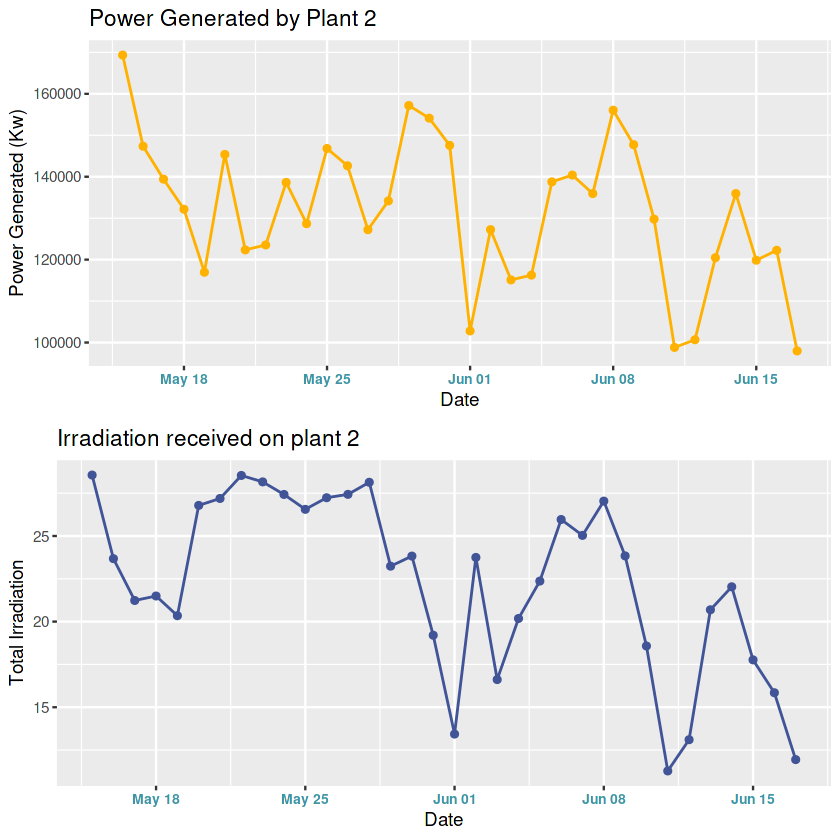

In [17]:
# Plotting Total irradiation received on plant 1 and 2
yield <- plant2_by_yield %>% 
  group_by(date) %>% 
  summarize(total_yield = sum(yield)) %>% 
  ggplot(aes(x = date, y = total_yield)) +
  geom_line(color = "#ffb100", size = 0.6) +
  geom_point(color = "#ffb100") +
  labs(title = "Power Generated by Plant 2", x = "Date", y = "Power Generated (Kw)") +
  theme(axis.text.x = element_text(face = "bold", size = 8, color = "#4095a5"))

irradiation <- plant2_we %>% 
  group_by(date = date(dateTime)) %>% 
  summarize(total_irradiation = sum(irradiation)) %>% 
  ggplot(aes(x = date, y = total_irradiation)) +
  geom_line(size = 0.6, color = "#405497") +
  geom_point(color = "#405497") +
  labs(title = "Irradiation received on plant 2", x = "Date", y = "Total Irradiation") +
  theme(axis.text.x = element_text(face = "bold", size = 8, color = "#4095a5"))
grid.arrange(yield, irradiation, nrow = 2)

**We can see a similar trend between the power generated and irradiation.**

**Now lets find the coefficient of correlation to find out the correlation between different parameters of Plant 1.**

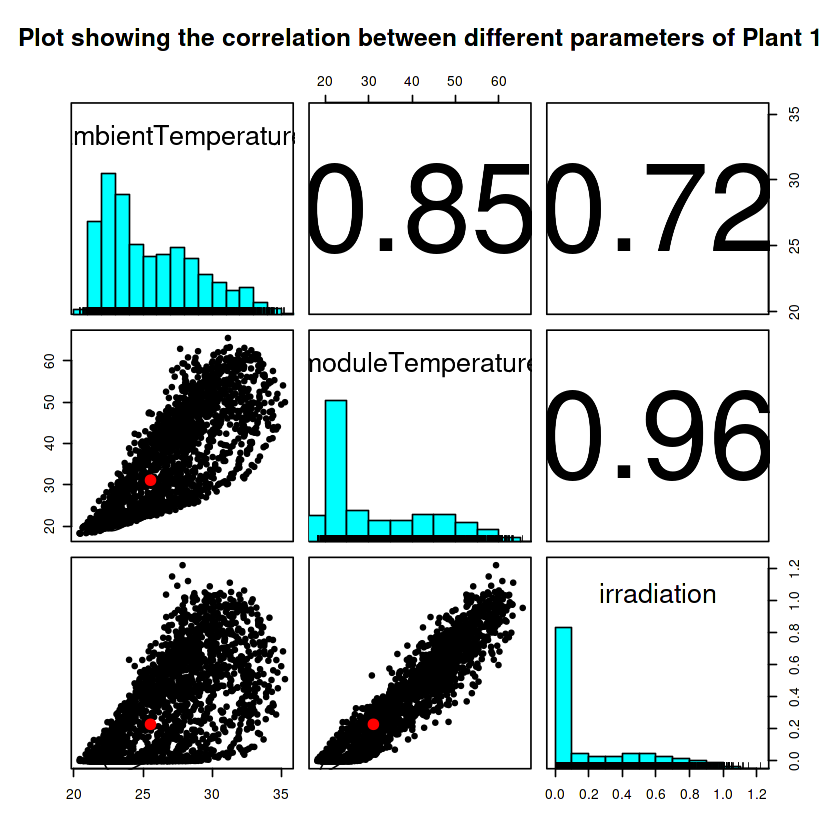

In [18]:
# For plant 1
pairs.panels(plant1_we[3:5],
             smooth = FALSE,
             density = FALSE,
             main = "Plot showing the correlation between different parameters of Plant 1") 

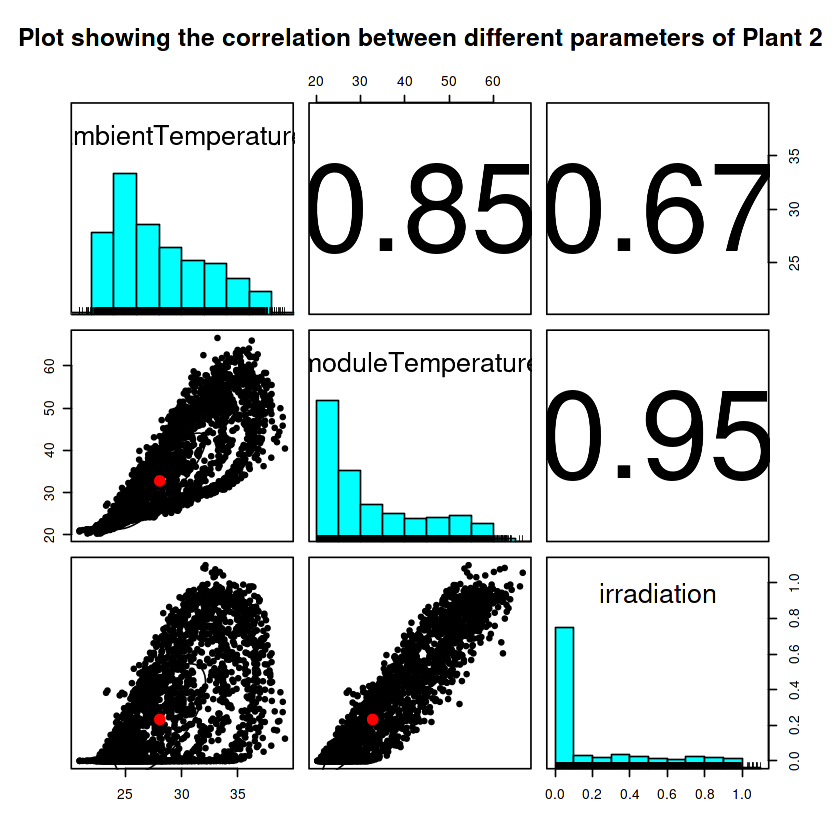

In [19]:
# For plant 2
pairs.panels(plant2_we[3:5],
             smooth = FALSE,
             density = FALSE,
             main = "Plot showing the correlation between different parameters of Plant 2") 

**Insights**
* *There is a strong positive co realation between the Module temperature and the irradiation. So, if the irradiation increases we can safely assume that the module temperature would also increase.*

**Now lets have a look at the Dc Power generated by different source keys at different time intervals to see if there are any underperforming inverters**

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.



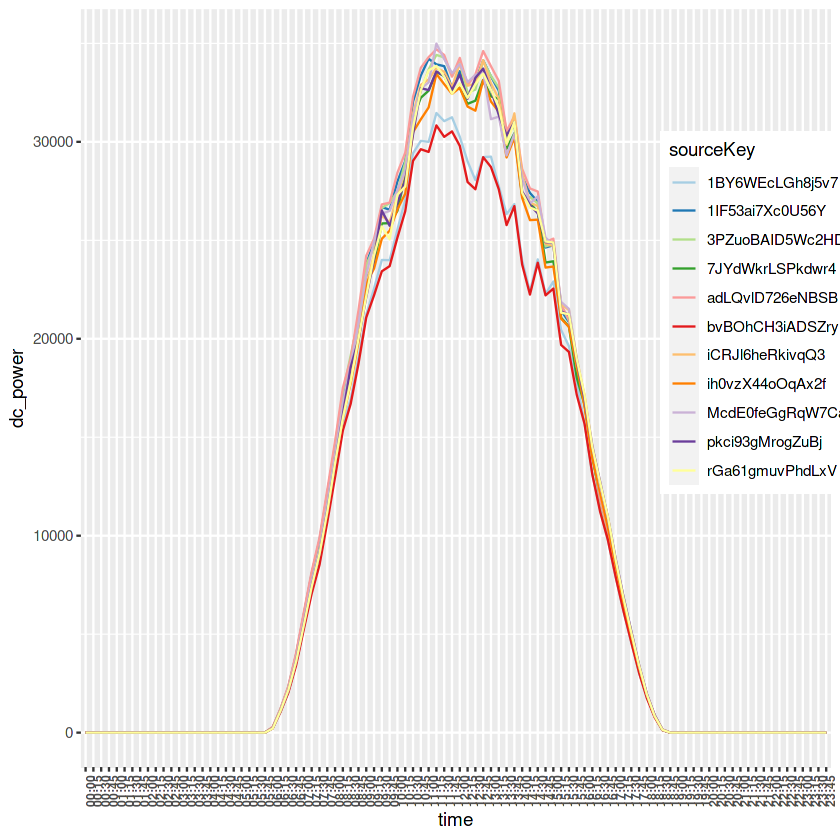

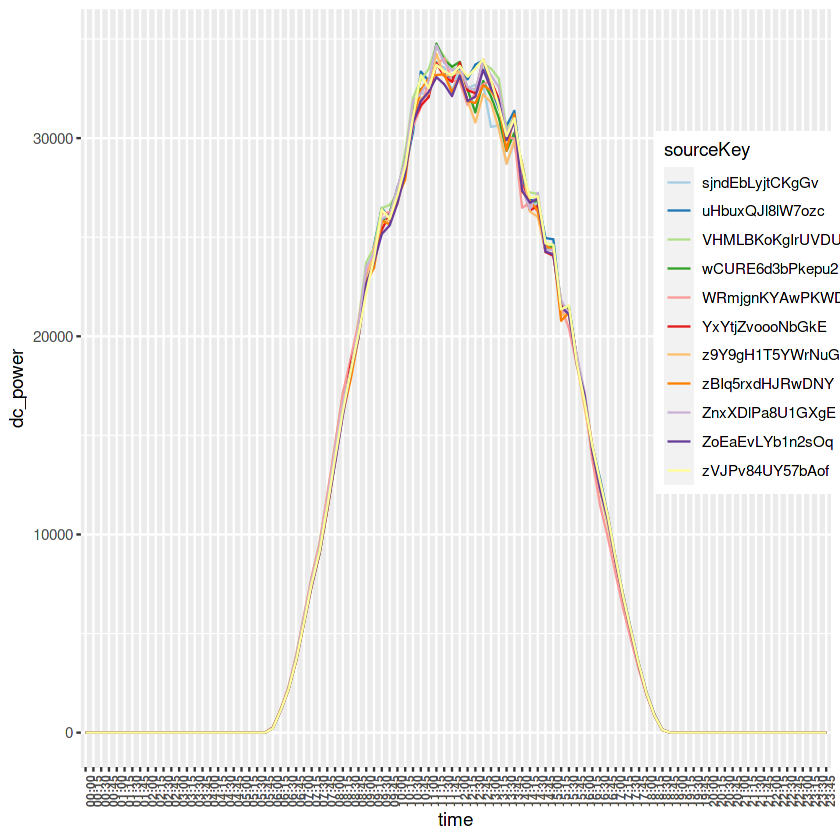

In [20]:
# For the first 11 inverters
plant1_gen %>% 
  filter(sourceKey %in% unlist(first11_inv_1)) %>% 
  group_by(time, sourceKey) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot(aes(x = time, y = dc_power,group = sourceKey)) +
  geom_line(aes(color = sourceKey)) +
  scale_color_brewer(palette = "Paired") +
  theme(axis.text.x = element_text(face = "bold", angle = 90, size = 7), legend.position =  c(0.9,0.6))
# For the last 11 inverters
plant1_gen %>% 
  filter(sourceKey %in% unlist(last11_inv_1)) %>% 
  group_by(time, sourceKey) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot(aes(x = time, y = dc_power,group = sourceKey)) +
  geom_line(aes(color = sourceKey)) +
  scale_color_brewer(palette = "Paired") +
  theme(axis.text.x = element_text(face = "bold", angle = 90, size = 7), legend.position =  c(0.9,0.6))

**Insights** 
1. We can see that the solar panels connected to the inverters **"1BY6WEcLGh8j5v7"** and **"bvBOhCH3iADSZry"** are producing less Dc Power as compared to other panels. They might need cleaning or maintenance. 

**Lets investigate further into them.**

`summarise()` has grouped output by 'date', 'time', 'sourceKey'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'date', 'time', 'sourceKey'. You can override using the `.groups` argument.



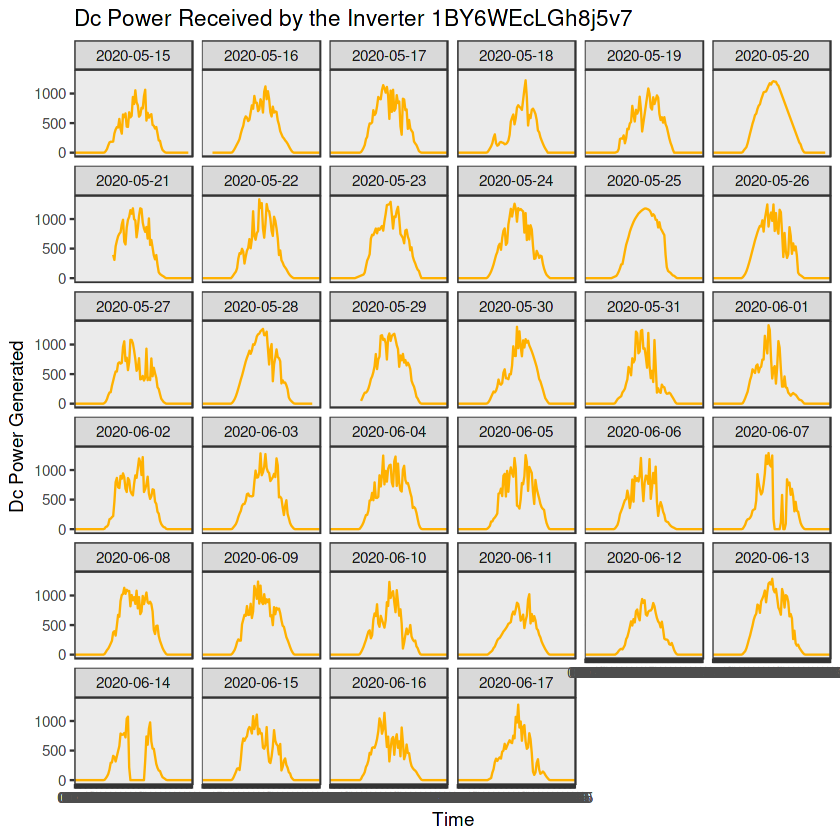

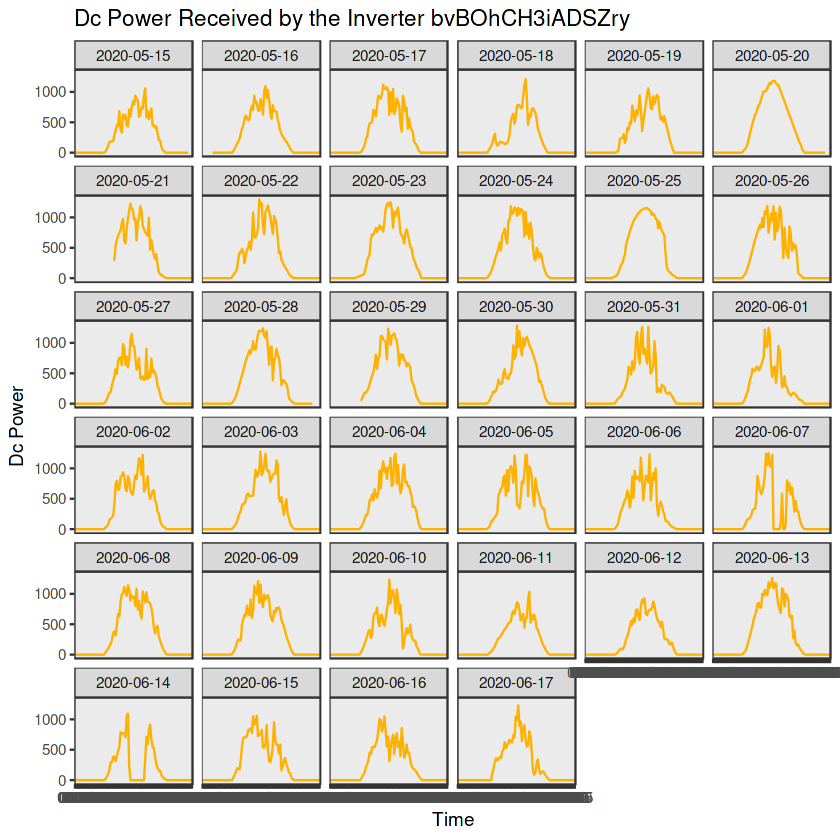

In [21]:
# Plotting Dc Power received by the first inverter on different days.
plant1_gen %>%
  filter(sourceKey == "1BY6WEcLGh8j5v7") %>% 
  group_by(date, time, sourceKey, dailyYield) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dc_power,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Received by the Inverter 1BY6WEcLGh8j5v7", x = "Time", y = "Dc Power Generated") +
  facet_wrap(~date) +
  theme_bw() 
# Plotting Dc Power received by the first inverter on different days.
plant1_gen %>%
  filter(sourceKey == "bvBOhCH3iADSZry") %>% 
  group_by(date, time, sourceKey, dailyYield) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dc_power,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Received by the Inverter bvBOhCH3iADSZry", x = "Time", y = "Dc Power") +
  facet_wrap(~date) +
  theme_bw() 

**Insights**
**For the first inverter**
*1. We can see that there are times when Dc Power Generation is zero, also we have some missing values. 
* Like on 21st May, solar panels starts generating power almost in the afternoon.
* Also, on 7th June and 14th June, the Dc power generation drops to zero beside the time being the times of peak irradiation.


#### For plant 1:
**The suboptimally performing solar panels are panels connected to the inverters **"1BY6WEcLGh8j5v7"** and **"bvBOhCH3iADSZry"**

**Now Lets do the same for Plant 2**

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.



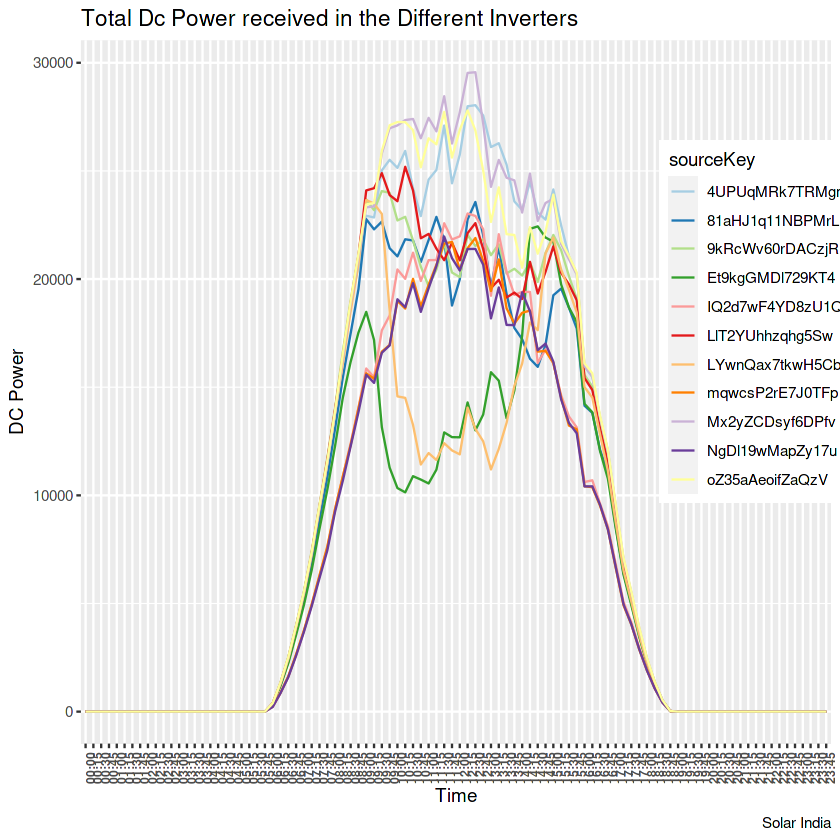

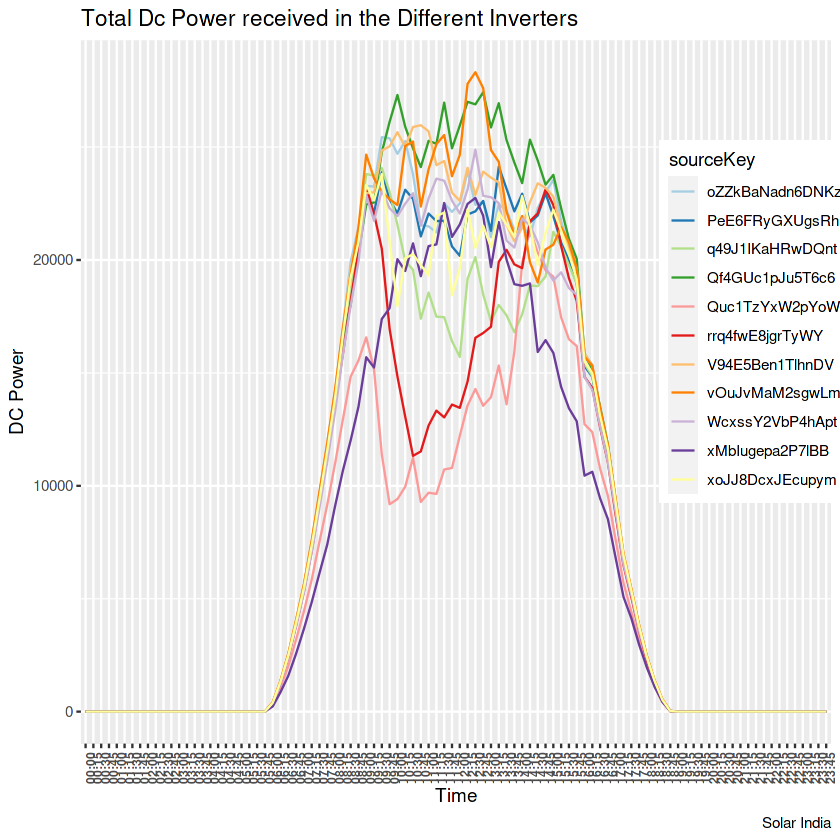

In [22]:
plant2_gen %>% 
  filter(sourceKey %in% unlist(first11_inv_2)) %>% 
  group_by(time, sourceKey) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot(aes(x = time, y = dc_power,group = sourceKey)) +
  geom_line(aes(color = sourceKey)) +
  scale_color_brewer(palette = "Paired") +
  theme(axis.text.x = element_text(face = "bold", angle = 90, size = 7), legend.position =  c(0.9,0.6)) +
  labs(title = "Total Dc Power received in the Different Inverters", caption = "Solar India", x = "Time", y = "DC Power")
plant2_gen %>% 
  filter(sourceKey %in% unlist(last11_inv_2)) %>% 
  group_by(time, sourceKey) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot(aes(x = time, y = dc_power,group = sourceKey)) +
  geom_line(aes(color = sourceKey)) +
  scale_color_brewer(palette = "Paired") +
  theme(axis.text.x = element_text(face = "bold", angle = 90, size = 7), legend.position =  c(0.9,0.6)) +
  labs(title = "Total Dc Power received in the Different Inverters",caption = "Solar India",x = "Time", y = "DC Power")

**The Dc Power Generation for Plant 2 is really uneven, the Dc Power received in the different inverters varies a lot.**  
**Here, we will be considering the two worst performing solar panels which are sending the least Dc Power to the inverters.**  
**All the panels in this plant might need some cleaning and maintenance since they are not performing well.**


**Lets look at the Dc power generation for the worst performing inverters.**  
**The inverters which we will be considering are:** **“Et9kgGMDl729KT4”, “LYwnQax7tkwH5Cb”, “Quc1TzYxW2pYoWX” and “rrq4fwE8jgrTyWY”**  
**The solar panels connected to these inverters are performing very badly generating aroung 50% less DC Power as compared to other panels.**

`summarise()` has grouped output by 'date', 'time', 'sourceKey'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'date', 'time', 'sourceKey'. You can override using the `.groups` argument.



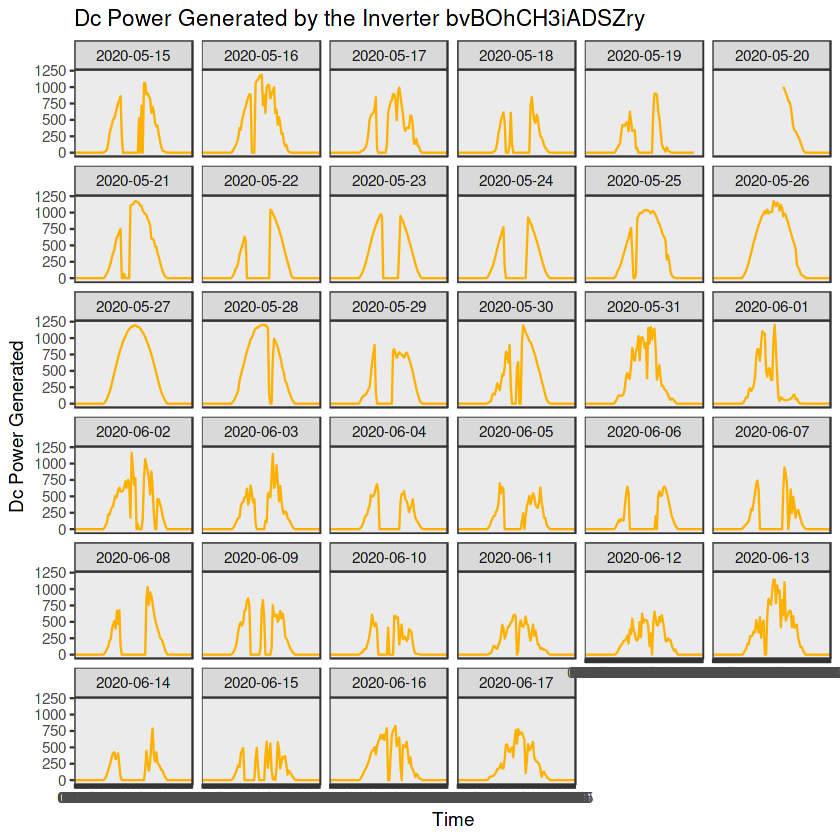

`summarise()` has grouped output by 'date', 'time', 'sourceKey'. You can override using the `.groups` argument.



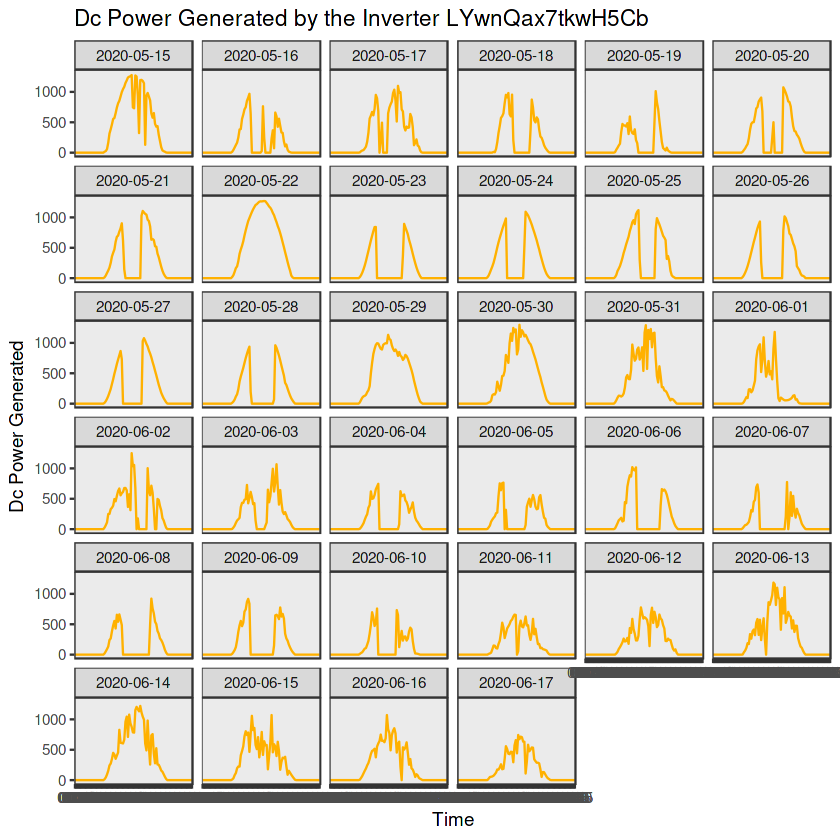

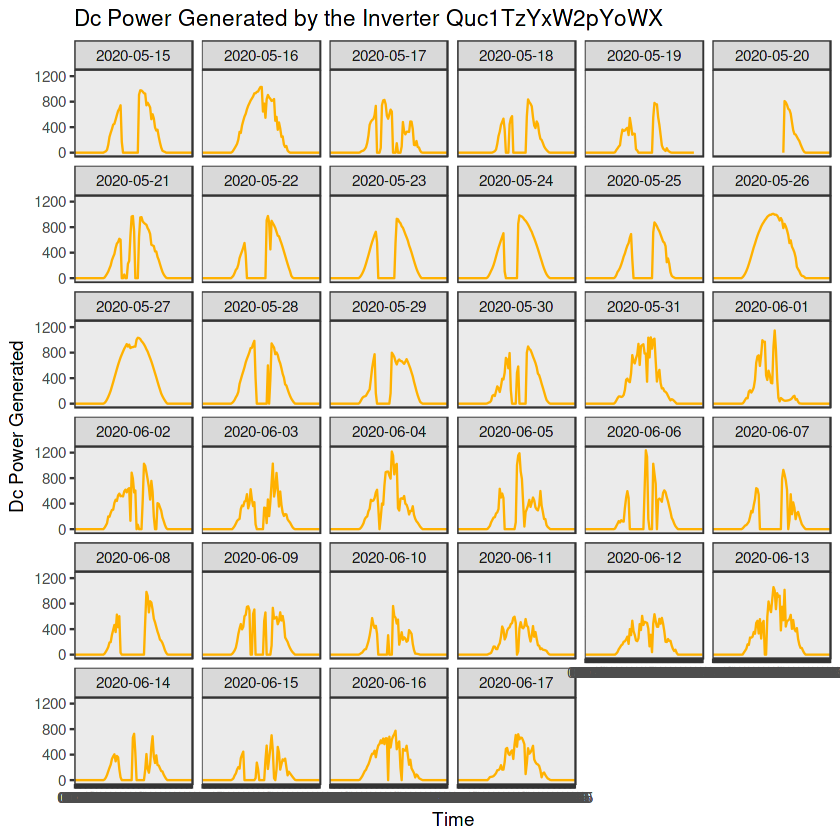

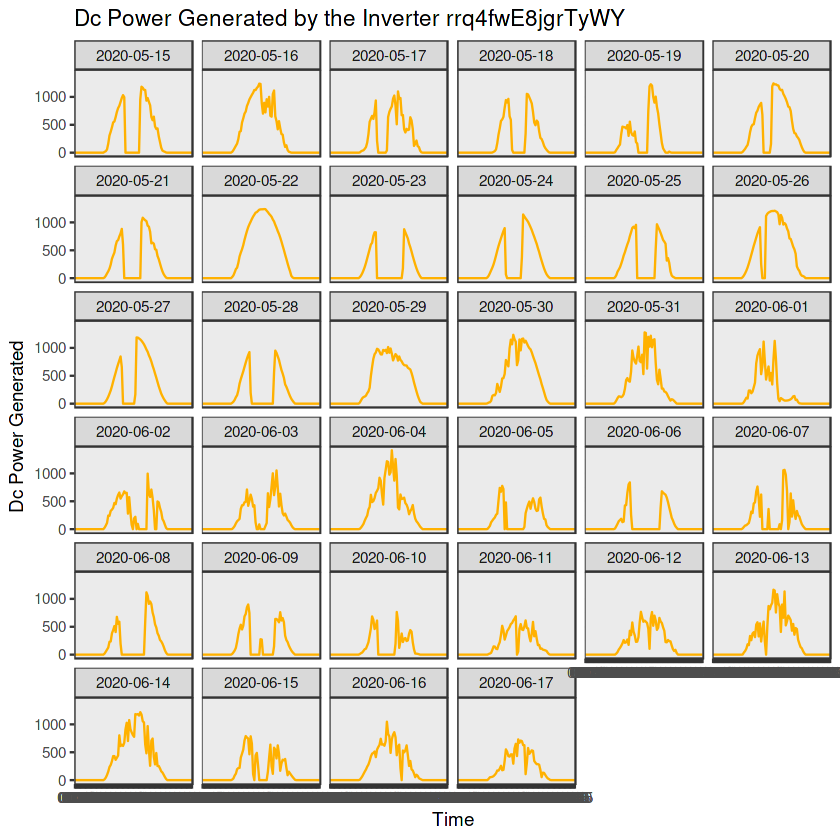

In [23]:
plant2_gen %>%
  filter(sourceKey == "Et9kgGMDl729KT4") %>% 
  group_by(date, time, sourceKey, dailyYield) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dc_power,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Generated by the Inverter bvBOhCH3iADSZry", x = "Time", y = "Dc Power Generated") +
  facet_wrap(~date) +
  theme_bw()
plant2_gen %>%
  filter(sourceKey == "LYwnQax7tkwH5Cb") %>% 
  group_by(date, time, sourceKey, dailyYield) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dc_power,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Generated by the Inverter LYwnQax7tkwH5Cb", x = "Time", y = "Dc Power Generated") +
  facet_wrap(~date) +
  theme_bw()
plant2_gen %>%
  filter(sourceKey == "Quc1TzYxW2pYoWX") %>% 
  group_by(date, time, sourceKey, dailyYield) %>% 
  summarize(dc_power = sum(dcPower)) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dc_power,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Generated by the Inverter Quc1TzYxW2pYoWX", x = "Time", y = "Dc Power Generated") +
  facet_wrap(~date) +
  theme_bw()
plant2_gen %>%
  filter(sourceKey == "rrq4fwE8jgrTyWY") %>% 
  group_by(date, time, sourceKey) %>% 
  ggplot() + 
  geom_line(aes(x = time, y = dcPower,group = 1), color = "#ffb100") +
  labs(title = "Dc Power Generated by the Inverter rrq4fwE8jgrTyWY", x = "Time", y = "Dc Power Generated") +
  facet_wrap(~date) +
  theme_bw()

**Insights**  
**Looking at the plots, we can see that on some days the Dc Power generated is zero besides being in the time period of maximum irradiation.**
**Between 23rd May and 25th May, the Dc Power generation went suddenly to zero in the all four inverters at the times of peak irradiation. This might be the time when the plant is in the cleaning or maintenance phase.**  
**Also on 20th May two out of the four inverters have missing values of the Dc Power generation.**  
**The management should do close inspection in the Plant 2.**

**Now lets have a look at how at the proportion of the Dc Power generated by different inverters in the two plants**

**Firstly for Plant 1**

In [24]:
data <- plant1_gen %>% 
  group_by(sourceKey) %>% 
  summarize(DcPower = sum(dcPower))
data_1 <- plant2_gen %>% 
  group_by(sourceKey) %>% 
  summarize(DcPower = sum(dcPower))

In [25]:
plant1 <- plot_ly(data, labels = ~sourceKey, values = ~DcPower, type = 'pie')  %>% 
  layout(xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
         yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))
saveWidget(plant1, 'DC Power Received in Different Inverters in Plant1.html')
display_html('<iframe src="DC Power Received in Different Inverters in Plant1.html" width=100% height=400></iframe>')

**For plant 1 we can see that proportion of Dc Power generated is almost evenly distributed with inverter contributing around 4.2 to 4.7 % of the total power.**

**Now Lets do the same for Plant 2.**


In [26]:
plant2 <- plot_ly(data_1, labels = ~sourceKey, values = ~DcPower, type = 'pie')  %>% 
  layout(xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
         yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))
saveWidget(plant2, 'DC Power Received in Different Inverters in Plant2.html')
display_html('<iframe src="DC Power Received in Different Inverters in Plant2.html" width=100% height=400></iframe>')

**The proportions here is not evenly distributed with some contributing around 3 to 3.7 % while others contributing 4.8 to 5.45 %.**

**Maintenance is needed in the solar panels connected to these inverters**

**Now lets try to find some relationship between the generation data and the weather sensor data for the two plants.**

Let's first start by joining the tables containing the generation and weather sensor data.

In [27]:
# Joining the two tables for Plant 1.
plant1_comb <- inner_join(plant1_gen, plant1_we, by = "dateTime")
# Joining the two tables for Plant 2.
plant2_comb <- inner_join(plant2_gen, plant2_we, by = "dateTime")

In [28]:
# Getting a look at the head of the two tables.
head(plant1_comb)
head(plant2_comb)

dateTime,plantId.x,sourceKey,dcPower,acPower,dailyYield,totalYield,time.x,date.x,electrical_eff,plantId.y,ambientTemperature,moduleTemperature,irradiation,time.y,date.y
<dttm>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
2020-05-15,4135001,1BY6WEcLGh8j5v7,0,0,0,6259559,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15
2020-05-15,4135001,1IF53ai7Xc0U56Y,0,0,0,6183645,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15
2020-05-15,4135001,3PZuoBAID5Wc2HD,0,0,0,6987759,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15
2020-05-15,4135001,7JYdWkrLSPkdwr4,0,0,0,7602960,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15
2020-05-15,4135001,McdE0feGgRqW7Ca,0,0,0,7158964,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15
2020-05-15,4135001,VHMLBKoKgIrUVDU,0,0,0,7206408,00:00,2020-05-15,0,4135001,25.18432,22.85751,0,00:00,2020-05-15


dateTime,plantId.x,sourceKey,dcPower,acPower,dailyYield,totalYield,time.x,date.x,electrical_eff,plantId.y,ambientTemperature,moduleTemperature,irradiation,time.y,date.y
<dttm>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
2020-05-15,4136001,4UPUqMRk7TRMgml,0,0,9425.0000,2429011,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15
2020-05-15,4136001,81aHJ1q11NBPMrL,0,0,0.0000,1215278736,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15
2020-05-15,4136001,9kRcWv60rDACzjR,0,0,3075.3333,2247719577,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15
2020-05-15,4136001,Et9kgGMDl729KT4,0,0,269.9333,1704250,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15
2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0,0,3177.0000,19941526,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15
2020-05-15,4136001,LYwnQax7tkwH5Cb,0,0,1872.5000,1794958634,00:00,2020-05-15,0,4136001,27.00476,25.06079,0,00:00,2020-05-15


**We can see that there are some extra columns in the data.**
**Lets remove them.**

In [29]:
plant1_comb <- plant1_comb %>% 
  select(-c(time.x,date.x,plantId.y,electrical_eff))
plant2_comb <- plant2_comb %>% 
  select(-c(time.x,date.x,plantId.y, electrical_eff))

**Lets plot the correlation plot for the different variables in the data.**

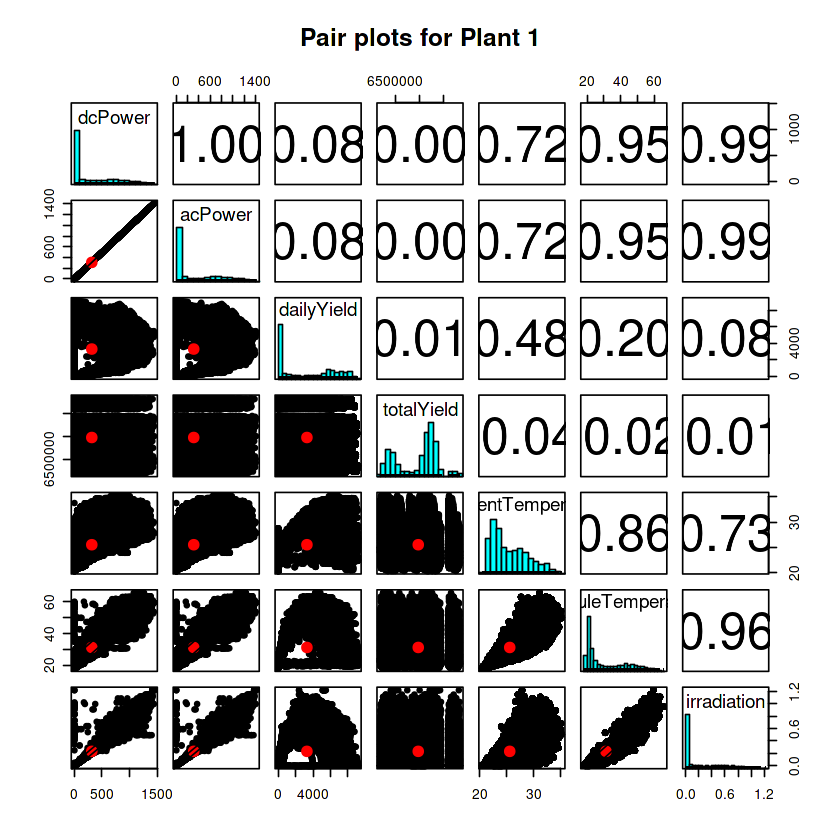

In [30]:
pairs.panels(plant1_comb[4:10],
            density = FALSE,
            smooth = FALSE,
            main = "Pair plots for Plant 1")

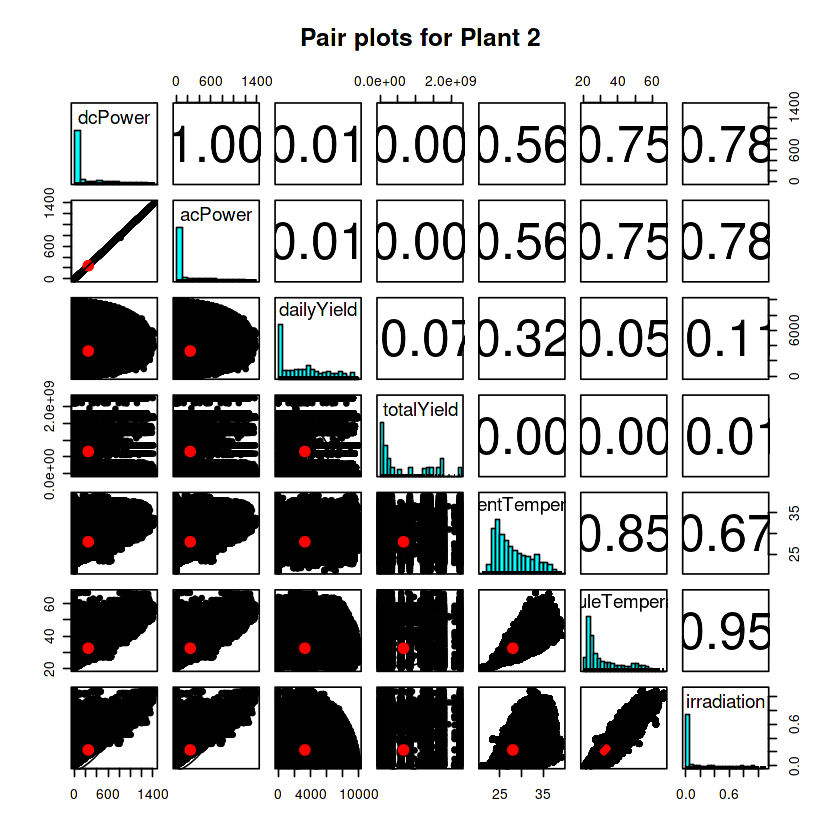

In [31]:
pairs.panels(plant2_comb[4:10],
             density = FALSE,
             smooth = FALSE,
             main = "Pair plots for Plant 2")

**From the above correlation plot we can see that the correlation coefficient between Module Temperature and Irradiation is 0.95 which means they almost have a liner correlation.**
**Now lets plot Ambient and Module Temperature for the two plants.**

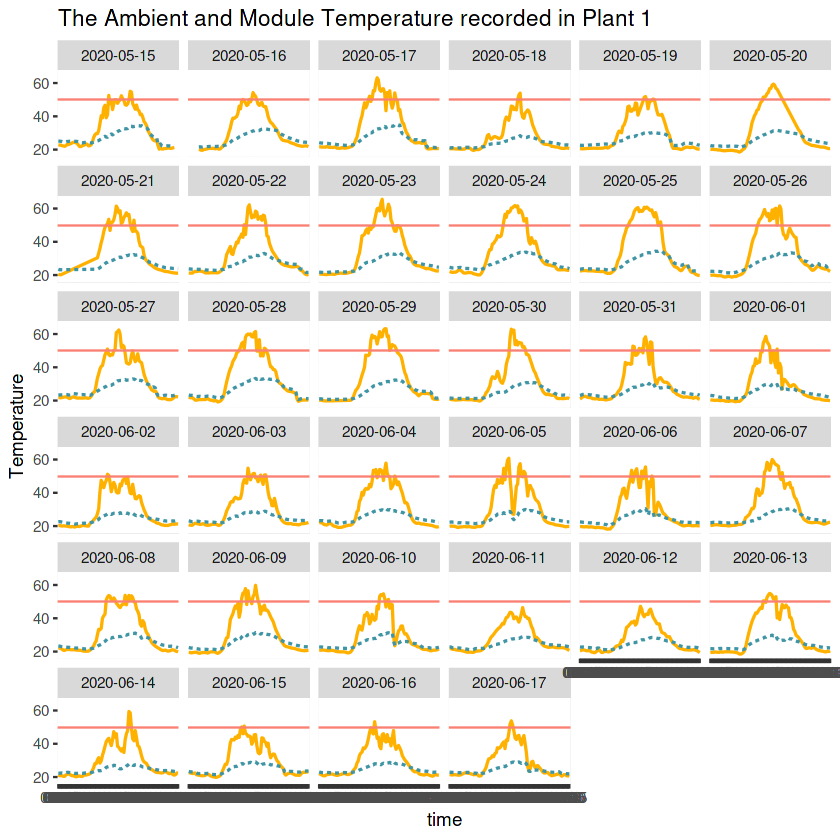

In [32]:
# Plotting the ambient and module temperature on different days.
plant1_we %>% 
  select(date, time, ambientTemperature, moduleTemperature) %>% 
  ggplot() +
  geom_line(aes(x = time, y = moduleTemperature,group = 1),color = "#ffb100", size = 0.7, linetype = "solid") +
  geom_line(aes(x = time, y = ambientTemperature,group = 2),color = "#4095A5", size = 0.7, linetype = "dashed") +
  geom_hline(yintercept = 50, linetype = "solid", color = "salmon") +
  scale_y_continuous(name = "Temperature", labels = c(0,20,40,60), breaks = c(0,20,40,60) ) +
  labs(title = "The Ambient and Module Temperature recorded in Plant 1") +
  facet_wrap(~date)


**The horizontal line in the plot is 50 degrees C which is the ideal temperature for the plant working**
**We can see that on some of the days the ambient temperature goes above 50 degrees C which is not good for the equipments in the plant.** 
**The plant 1 should check if the cooling system is working efficiently or not.**

**Now lets do the same the same for plant 2 to see everything is working fine.**

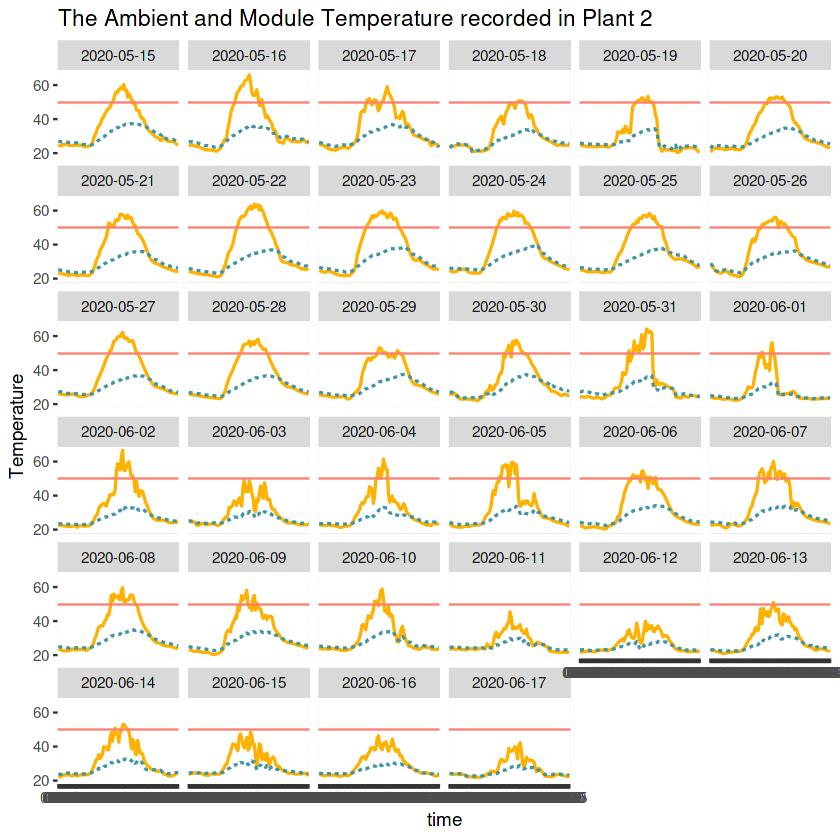

In [33]:
# Plotting the ambient and module temperature on different days.
plant2_we %>% 
  select(date, time, ambientTemperature, moduleTemperature) %>% 
  ggplot() +
  geom_line(aes(x = time, y = moduleTemperature,group = 1),color = "#ffb100", size = 0.7, linetype = "solid") +
  geom_line(aes(x = time, y = ambientTemperature,group = 2),color = "#4095A5", size = 0.7, linetype = "dashed") +
  geom_hline(yintercept = 50, linetype = "solid", color = "salmon") +
  scale_y_continuous(name = "Temperature", labels = c(0,20,40,60), breaks = c(0,20,40,60) ) +
  labs(title = "The Ambient and Module Temperature recorded in Plant 2") +
  facet_wrap(~date)


**The horizontal line in the plot is 50 degrees C which is the ideal temperature for the plant working**
**For plant 2 also the Module Temperature somedays reach as high as 60 degree celsius which is not good for the equipments in the plant.**

### Thanks for reading. 
**Do upvote if you like it.**  
**Have some Questions or Feedbacks? Feel free to drop them in the comments**